In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df= pd.read_csv(r'C:\Users\Peng\Desktop\New folder\PreScreen_r3\ingredient.csv')

In [3]:
df

,genotype,a,b,c,d,e,f,g,h,i
0,A,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,B,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,A,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,B,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,B,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
209,B,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16
210,A,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32
211,A,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00
212,B,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22


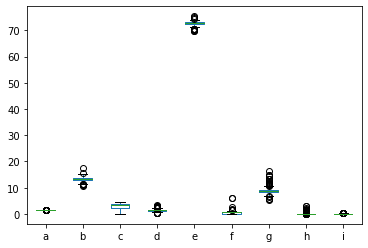

In [4]:
boxplots=df.boxplot(column=['a','b','c','d','e','f','g','h','i'], grid=False)


In [5]:
fvalue, pvalue = stats.f_oneway(df['a'], df['b'], df['c'], df['d'], df['e'], df['f'], df['g'], df['h'], df['i'] )
print(fvalue, pvalue)

168331.96885835085 0.0


In [6]:
d_melt = pd.melt(df.reset_index(), id_vars=['genotype'], value_vars=['a','b','c','d','e','f','g','h','i'])
d_melt.columns = ['genotype', 'treatments', 'value']
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),943261.084445,8.0,168331.968858,0.0
Residual,1342.757047,1917.0,NaN,NaN


In [7]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['treatments'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     a      b  11.8895  0.001  11.6382  12.1407   True
     a      c   1.1662  0.001   0.9149   1.4174   True
     a      d  -0.0735    0.9  -0.3247   0.1778  False
     a      e  71.1326  0.001  70.8813  71.3838   True
     a      f  -1.0213  0.001  -1.2726  -0.7701   True
     a      g   7.4386  0.001   7.1874   7.6898   True
     a      h  -1.3433  0.001  -1.5946  -1.0921   True
     a      i  -1.4614  0.001  -1.7126  -1.2101   True
     b      c -10.7233  0.001 -10.9746 -10.4721   True
     b      d -11.9629  0.001 -12.2142 -11.7117   True
     b      e  59.2431  0.001  58.9918  59.4943   True
     b      f -12.9108  0.001  -13.162 -12.6595   True
     b      g  -4.4509  0.001  -4.7021  -4.1996   True
     b      h -13.2328  0.001  -13.484 -12.9816   True
     b      i -13.3508  0.001 -13.6021 -13.0996   True
     c    

In [8]:
w, pvalue = stats.levene(df['a'], df['b'], df['c'], df['d'], df['e'], df['f'], df['g'], df['h'], df['i'] )
print(w, pvalue)

47.63190092854356 2.3140244743635312e-70
